# Clustering with KMeans

#### What is **clustering**? Clustering is being used in Unsupervised Learning Algorithm in Machine Learning as it can be segregated multivariate data into various groups, without any supervisor, on basis of common pattern hidden inside the datasets.
#### What Is **K Means Algorithm**? Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.
The working of the K-Means algorithm is explained in the below steps:

- Step-1: Select the value of K, to decide the number of clusters to be formed.

- Step-2: Select random K points which will act as centroids.

- Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

- Step-4: place a new centroid of each cluster.

- Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

- Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

- Step-7: FINISH

#### Choosing the right number of clusters
To find the optimal value of clusters, the elbow method follows the below steps:
1. Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).

2. For each value of K, calculates the WCSS value.

3. Plots a graph/curve between WCSS values and the respective number of clusters K.

4. The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K

Source: [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/#:~:text=Step-1%3A%20Select%20the%20value,will%20form%20the%20predefined%20clusters)

Implementation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Load data
data = pd.read_csv('credit-card_dataset.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data processing

In [4]:
# Data cleaning
data['CREDIT_LIMIT'].fillna(0, inplace=True)
data['PURCHASES'].fillna(0, inplace=True)

# Select columns
X = data.loc[:, ['CREDIT_LIMIT', 'PURCHASES']]

# Split arrays or matrices into random train and test subsets
# training_data, testing_data = train_test_split(X)

Applying **Elbow Method** with yellowbrick <br>
The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. We can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

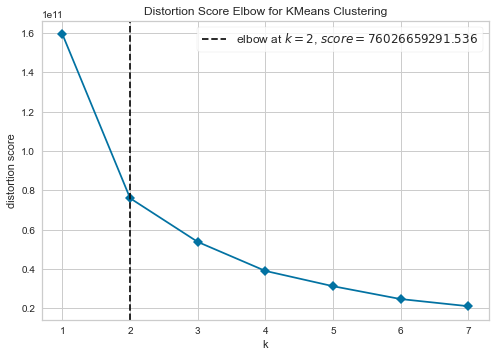

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 8), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [15]:
# Clustering using the optimal number K = 2
model = KMeans(2)
model.fit(X)
identified_clusters = model.fit_predict(X)

In [16]:
# Create results dataset
df = pd.DataFrame({'credit': data['CREDIT_LIMIT'], 'purchase': data['PURCHASES'], 'cluster': identified_clusters})
df.head()

,credit,purchase,cluster
0,1000.0,95.40,0
1,7000.0,0.00,1
2,7500.0,773.17,1
3,7500.0,1499.00,1
4,1200.0,16.00,0


Text(0, 0.5, 'Credit Limit')

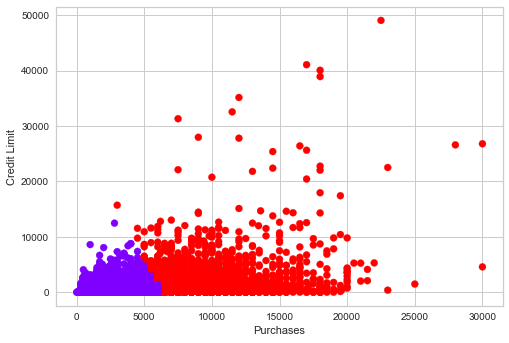

In [17]:
# Plot clusters
plt.scatter(df['credit'], df['purchase'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')